# Linear Regression

In [13]:
import pandas as pd
import numpy as np

In [14]:
dia=pd.read_csv("Diamond Price Prediction.csv")
dia

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [15]:
dia=dia.iloc[:,1:]
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [19]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
dia.info()
dia.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
temp=dia.describe()
temp

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


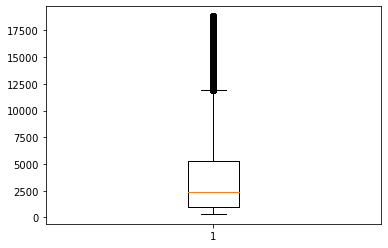

In [39]:
import matplotlib.pyplot as plt
plt.boxplot(dia["price"]);

In [33]:
#IQR
Q3=temp.loc["75%","price"]
Q3

5324.25

In [35]:
Q1=temp.loc["25%","price"]
Q1

950.0

In [36]:
IQR=Q3-Q1
IQR

4374.25

In [111]:
#Upper
upper=Q3+1.5*IQR

In [110]:
#Lower
lower=Q1-1.5*IQR

# Linear Regression With Outliers

In [43]:
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [45]:
y=dia["price"]
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [49]:
dia.columns
X=dia.loc[:,['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z']]

In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
le=LabelEncoder()
ss=StandardScaler()
norm=MinMaxScaler()

In [56]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [74]:
X["cut"]=le.fit_transform(X["cut"])
X["color"]=le.fit_transform(X["color"])
X["clarity"]=le.fit_transform(X["clarity"])

In [88]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [94]:
for i in ['carat', 'depth', 'table', 'x', 'y', 'z']:
    X[i]=norm.fit_transform(X[[i]])

In [95]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.011029,2,1,3,0.453552,0.238095,0.036166,0.047187,0.064171
1,0.003676,3,1,2,0.360656,0.714286,0.025316,0.021779,0.032086
2,0.011029,1,1,4,0.202186,0.912698,0.054250,0.063521,0.032086
3,0.033088,3,5,5,0.502732,0.476190,0.081374,0.092559,0.117647
4,0.040441,1,6,3,0.551913,0.476190,0.106691,0.114338,0.149733
...,...,...,...,...,...,...,...,...,...
53935,0.191176,2,0,2,0.415301,0.396825,0.361664,0.370236,0.350267
53936,0.191176,1,0,2,0.540984,0.238095,0.350814,0.368421,0.379679
53937,0.183824,4,0,2,0.524590,0.634921,0.345389,0.355717,0.366310
53938,0.242647,3,4,3,0.426230,0.476190,0.433996,0.435572,0.414439


In [97]:
#Train test Split
from sklearn.model_selection import train_test_split



In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [100]:
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
pred=lr.predict(X_test)

In [105]:
pred[:10]

array([  503.89898296,  3220.64240648,  2093.21360133,  2278.06630765,
       10530.59782027,  5617.34749415,  1866.1725387 ,  2603.34702281,
        2957.37599454,  5867.66199127])

In [107]:
y_test[:10]

1388      559
50052    2201
41645    1238
42377    1304
17244    6901
1608     3011
46398    1765
45493    1679
49385    2102
10460    4789
Name: price, dtype: int64

In [108]:
r2_score(pred,y_test)

0.8796143094685431

In [109]:
#With the Outliers
r2_score(pred,y_test)
r2_score(y_test,pred)

0.8926644272477685

# Linear Regression withour Outliers

In [123]:
upper

11885.625

In [127]:
X=dia.copy()
X

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [131]:
X[X["price"]>=upper]

,carat,cut,color,clarity,depth,table,price,x,y,z
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [137]:
X["price"].median()

2401.0

In [139]:
#Replacing Outliers values with Median values
X["price"]=np.where(X["price"]>=upper,X["price"].median(),X["price"])
X

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [143]:
X[X["price"]>upper]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [144]:
X=dia.loc[:,['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y',
       'z']]
y=dia["price"]

In [145]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [146]:
X["cut"]=le.fit_transform(X["cut"])
X["color"]=le.fit_transform(X["color"])
X["clarity"]=le.fit_transform(X["clarity"])
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [149]:
X.columns
for i in ['carat', 'depth', 'table', 'x', 'y', 'z']:
    X[i]=ss.fit_transform(X[[i]])

In [150]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.198168,2,1,3,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,3,1,2,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,1,1,4,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,3,5,5,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,1,6,3,1.082358,0.242928,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...,...,...
53935,-0.164427,2,0,2,-0.662711,-0.204605,0.016798,0.022304,-0.054888
53936,-0.164427,1,0,2,0.942753,-1.099672,-0.036690,0.013548,0.100988
53937,-0.206621,4,0,2,0.733344,1.137995,-0.063434,-0.047741,0.030135
53938,0.130927,3,4,3,-0.523105,0.242928,0.373383,0.337506,0.285204


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [155]:
lr.fit(X_train,y_train)

LinearRegression()

In [159]:
New_pred=lr.predict(X_test)
New_pred[:10]

array([  358.15837605,  3360.36415464,  2142.65550962,  2374.90670039,
       10540.65421932,  5685.89190074,  1900.97281595,  2615.14235368,
        3077.4108749 ,  5815.62915757])

In [161]:
y_test

1388       559
50052     2201
41645     1238
42377     1304
17244     6901
         ...  
29577      705
12564     5278
24786    13157
1332      2960
42527     1323
Name: price, Length: 16182, dtype: int64

In [168]:
r2_score(New_pred,y_test)*100
r2_score(y_test,New_pred)*100

87.16563694090252

In [176]:
#Without the Outliers
print(r2_score(New_pred,y_test)*100)
print(r2_score(y_test,New_pred)*100)

87.16563694090252
88.63641648837631


In [187]:
#With the Outliers
print(r2_score(pred,y_test)*100)
print(r2_score(y_test,pred)*100)

87.9614309468543
89.26644272477685
